               A          B          C          D
count   5.000000   5.000000   5.000000   5.000000
mean   29.600000  45.000000  31.200000  60.000000
std     4.037326  11.202678   3.898718   8.514693
min    25.000000  29.000000  27.000000  51.000000
25%    28.000000  40.000000  29.000000  54.000000
50%    29.000000  45.000000  30.000000  60.000000
75%    30.000000  55.000000  33.000000  62.000000
max    36.000000  56.000000  37.000000  73.000000


Text(0, 0.5, 'Score')

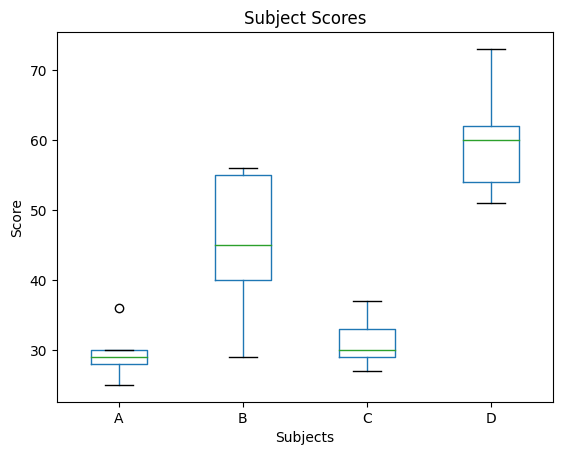

In [1]:
#one way anova
#descriptive statics and boxplot for the dataset
import pandas as pd
from matplotlib import pyplot as plt

dataset = pd.read_excel("score.xlsx")
print(dataset.describe())

dataset.boxplot(column=['A', 'B', 'C', 'D'], grid=False)
plt.title("Subject Scores")
plt.xlabel("Subjects")
plt.ylabel("Score")



In [2]:
#compare the means of Subjects A, B, C, and D.
#one way annova testing for scorexlx
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel("score.xlsx")
fvalue, pvalue = stats.f_oneway(dataset["A"], dataset["B"],dataset["C"], dataset["D"])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))


F Value  = 17.4928 
P Value  = 2.63924e-05 


In [3]:
#automate conclusion
import pandas as pd
import scipy.stats as stats

dataset = pd.read_excel("score.xlsx")
fvalue, pvalue = stats.f_oneway(dataset["A"], dataset["B"],dataset["C"], dataset["D"])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))

alpha = 0.05

if pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis is accepted")


F Value  = 17.4928 
P Value  = 2.63924e-05 
The null hypothesis can be rejected


In [5]:
#one way anova
#Conduct descriptive statistical analysis on dataset in iris.csv
import pandas as pd
import scipy.stats as stats

dataset = pd.read_csv("iris.csv")
groupby_name = dataset.groupby('name')
print(groupby_name.head())
print(groupby_name['petal_width'].describe())
print("\n")
print("\n")

df=groupby_name.describe()
df_transposed = df.T
print(df_transposed)


     sepal_length  sepal_width  petal_length  petal_width        name
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
50            7.0          3.2           4.7          1.4  versicolor
51            6.4          3.2           4.5          1.5  versicolor
52            6.9          3.1           4.9          1.5  versicolor
53            5.5          2.3           4.0          1.3  versicolor
54            6.5          2.8           4.6          1.5  versicolor
100           6.3          3.3           6.0          2.5   virginica
101           5.8          2.7           5.1          1.9   virginica
102           7.1          3.0           5.9          2.1   virginica
103           6.3   

In [6]:
#test whether there is any significant difference in the mean of petal width for all the three types of irises
#one way annove-type 1
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("iris.csv")
fvalue, pvalue = stats.f_oneway(df['petal_width'][df['name'] == 'setosa'],
                                df['petal_width'][df['name'] == 'versicolor'],
                                df['petal_width'][df['name'] == 'virginica'])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))


F Value  = 959.324 
P Value  = 4.37696e-85 


In [7]:
#store in a array
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("iris.csv")
df2 =(df['petal_width'][df['name'] == 'setosa'],
                       df['petal_width'][df['name'] == 'versicolor'],
                       df['petal_width'][df['name'] == 'virginica'])
fvalue, pvalue = stats.f_oneway(df2[0], df2[1], df2[2])
print("F Value  = {:g} ".format(fvalue))
print("P Value  = {:g} ".format(pvalue))


F Value  = 959.324 
P Value  = 4.37696e-85 


            df      sum_sq     mean_sq          F    PR(>F)
Fitness    1.0  666.216867  666.216867  34.749543  0.000006
Residual  22.0  421.783133   19.171961        NaN       NaN
              sum_sq    df          F    PR(>F)
Fitness   666.216867   1.0  34.749543  0.000006
Residual  421.783133  22.0        NaN       NaN
                sum_sq    df           F        PR(>F)
Intercept  6679.707064   1.0  348.410223  5.611672e-15
Fitness     666.216867   1.0   34.749543  6.230589e-06
Residual    421.783133  22.0         NaN           NaN


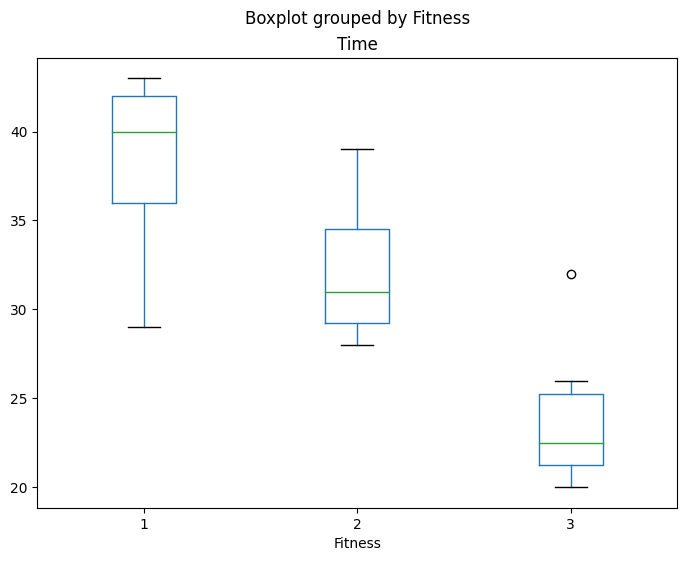

In [9]:
#one way anova table
#https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

dataset = pd.read_csv("rehab.csv")

#Plot box plots grouped by Fitness - Groups 1, 2, 3
fig, ax = plt.subplots(figsize=(8,6))
fig = dataset.boxplot('Time', 'Fitness', ax = ax, grid=False)

#Sum of Square
sum_lm = ols('Time ~ Fitness', data=dataset).fit()

print(anova_lm(sum_lm))
print(anova_lm(sum_lm, typ=2))
print(anova_lm(sum_lm, typ=3))
